In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.signal import convolve2d
from scipy.io import readsav

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm
# Rebuild the matplotlib font cache
fm._rebuild()

mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [3]:
# load the image from file
pth = '/Users/WilliamHenryAshfieldIV/dat/'
sji = fits.open(pth+'iris_l2_20141025_145828_3880106953_SJI_1330_t000.fits')[0].data
header = fits.open(pth+'iris_l2_20141025_145828_3880106953_SJI_1330_t000.fits')[0].header

In [4]:
aia = readsav(pth+'map_1600.sav',verbose=False,python_dict=False)
sjiII = readsav(pth+'map_sji.sav',verbose=False,python_dict=False)

In [5]:
time = sjiII.dmap_sji['time']

In [6]:
xc = header['xcen']
yc = header['ycen']
dx = header['cdelt1']
xc,yc,dx

(406.296, -318.077, 0.3327)

In [7]:
x = xc + dx*(np.arange(sji.shape[1])-sji.shape[1]/2.)
y = yc + dx*(np.arange(sji.shape[2])-sji.shape[2]/2.)

In [8]:
aia_dat = aia.saiamap['data'][345]
sji_dat = sjiII.dmap_sji['data'][476]

In [9]:
from scipy import ndimage
sji2 = ndimage.rotate(sji[476], 90)
aia_dat2 = ndimage.rotate(aia_dat, 90)

In [10]:
sji2[sji2 < 1.0] = 1.0

In [11]:
%store sji2
%store aia_dat2
%store x
%store y

Stored 'sji2' (ndarray)
Stored 'aia_dat2' (ndarray)
Stored 'x' (ndarray)
Stored 'y' (ndarray)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  


Text(0, 0.5, 'y [arcsec]')

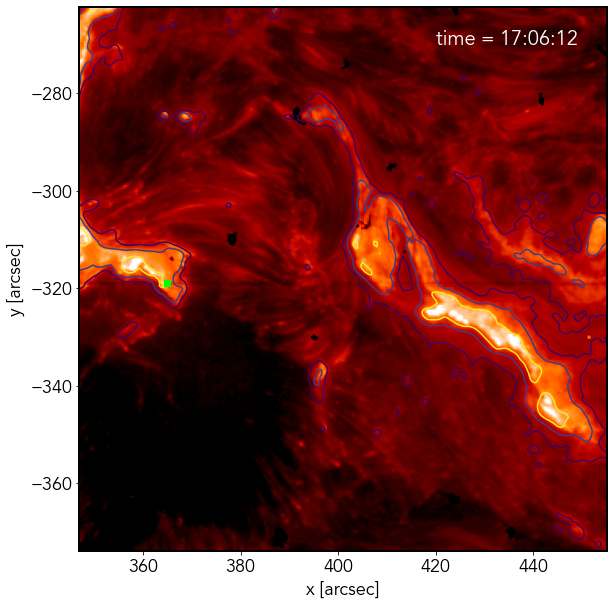

In [12]:
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(sji2,norm=LogNorm(),vmin=15,cmap='gist_heat',origin='lower',extent = (x[0],x[-1],y[0],y[-1]))

aia2 = np.roll(aia_dat2,3,axis=0)
aia2 = np.roll(aia2,-2,axis=1)
ax.contour(aia2,levels=[500,1100,4000],extent = (x[0],x[-1],y[0],y[-1]))

s=20*4**1.5
ax.scatter(x[69], y[180],marker=',',color='lime',zorder=2)

plt.text(420, -270, 'time = 17:06:12',
         fontsize=20, color='white')

ax.set_xlim(x[15],x[340])
ax.set_ylim(y[15],y[350])
ax.set_xlabel('x [arcsec]')
ax.set_ylabel('y [arcsec]')

#fig.savefig('IRIS_AIA_contour.png', format='png', edgecolor='w', dpi = 1000)

In [13]:
print('pixel location (arcsec):' ,x[69], y[180])
print('coords of box = ',x[15],x[340],y[15],y[350])

pixel location (arcsec): 364.87485 -318.90875
coords of box =  346.90905 455.03655 -373.80425 -262.34975
